<a href="https://colab.research.google.com/github/pcpiscator/Ciencia-de-dados/blob/master/Titanic01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio "Kaggle": Titanic

Este desafio foi preparado e disponibilizado pelo [Kaggle](https://www.kaggle.com/c/titanic), um website adquirido pelo Google para promover competições na área de ciência de dados e aprendizado de máquina. 

O **Titanic** é um dos eventos mais tristes da história de naugrágios. 

Em 15 de abril de 1912, durante sua viagem inaugural, o então considerado navio de passageiros com zero chance de naufrágio RMS Titanic afundou após colidir com um *iceberg*. Infelizmente, o RMS Titanic não contava com a quantidade suficiente de botes salva-vidas para todos a bordo, resultando com isto, na morte de 1502 passageiros de um total de uma tripulação de 2224 pessoas. 

Apesar de existir um elemento de sorte envolvida na sobrevivência neste desastre, parece que alguns grupos de pessoas tiveram mais chances de sobrevivências que outros. 

***Neste desafio, pede-se a você que construa um modelo preditivo que traga uma resposta para a pergunta: "quais grupos de pessoas tiveram mais chances de sobreviver neste desastre"? Para tanto, você deve explorar os dados de passageiros (ex. nome, idade, gênero, classe sócio-econômica, e outros).*** 

Este notebook apresenta um passo-a-passo na análise exploratória dos dados de passageiros, iniciando com um entendimento, logo após tratamento e por último, chegando na modelagem para responder a pergunta acima. 



<img src="https://19emhilsa.weebly.com/uploads/4/5/1/4/45147515/451019_orig.jpg"> </img>





# Previsão de Sobreviventes no Naufrágio do Titanic

### Conteúdo Abordado:
1. Importar Bibliotecas Necessárias
2. Carregar e Explorar os Dados
3. Análise Exploratória
4. Visualização dos Dados
5. Limpeza dos Dados
6. Escolha do Melhor Modelo


## 1) Importar Bibliotecas Necessárias
Primeiramente, como sempre, importaremos bibliotecas Python como pandas, numpy, matplotlib e seaborn. Esta última biblioteca permite plotar uns gráficos diferentes, e mais bonitos se compararmos com a biblioteca matplotlib.

In [84]:
# bibliotecas para análise de dados
import numpy as np
import pandas as pd

# bibliotecas para gráficos 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as py
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format
# bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# configuração para ignorar mensagens de advertência (warning). 
# Muitas vezes estas mensagens atrapalham, pois pode trazer a informação de 
# algo está muito errado com nosso código quando na verdade temos apenas uma situação de advertência. 
import warnings
warnings.filterwarnings('ignore')

## 2) Carregar e Explorar os Dados
Cabe lembrar que a pergunta que devemos responder para este desafio é a seguinte: **Quais grupos de pessoas tiveram mais chances de sobreviver neste desastre? Para tanto, você deve explorar os dados de passageiros (ex. nome, idade, gênero, classe sócio-econômica, e outros).** 

O *dataset* de passageiros foi particionado em outros dois *datasets*: dados de treinamento e dados de teste. 
O *dataset* de treinamento contém os dados que serão utilizados para criar o nosso modelo preditivo, ou seja, os dados utilizados para **treinar o nosso modelo**. Por outro lado, o *dataset* de teste contém os dados que serão utilizados para testar e validar o desempenho do modelo com análise de sua acurácia e outras métricas. 

Neste passo você carregará os dois conjuntos de dados: treinamento e teste. Carregar neste contexto significa "importar" os dados dentro do nosso *notebook* utilizando o método `pd.read_csv`. Uma primeira olhada nos dados pode ser feita usando o método `describe()`.

In [ ]:
# importar arquivos CSV: treinamento e teste. Note que os arquivos estão no Google Drive, e com isto, temos que acessá-los 
# através de um endereço web (URL) com caracteres 'estranhos' (chamados de 'hash'). Se os arquivos estivessem em seu computador,
# o acesso seria utilizando os nomes dos arquivos CSV treinamento.csv e teste.csv
url_arquivo_treinamento_csv='https://drive.google.com/uc?export=view&id=1dJWrDlgp43l9qcZtSJ8ArZSWvxKWaQCx'
url_arquivo_teste_csv='https://drive.google.com/uc?export=view&id=1wrYVj6EThqc1qX3QO_RWONGEQOf7tnJF'

dados= pd.read_csv(url_arquivo_treinamento_csv)
teste = pd.read_csv(url_arquivo_teste_csv)

# Dê uma olhada nos dados com o método describe. Passamos como parâmetro include=all para que todas as colunas do dataframe treinamento sejam apresentadas. 
dados.describe(include='all')

In [ ]:
dados

In [ ]:
dados.head()

## 3) Análise Exploratória
Agora, vamos analisar as variáveis (colunas) do *dataset* para verificar o tipo de dado, se dado faltante, se tem algum outro tipo de problema. Aqui resgatamos alguns dos conceitos de preparação de dados explorados nas semanas anteriores.
**Importante:** as variáveis (ou colunas) que utilizamos na criação da nossa solução, na forma de um modelo preditivo capaz de responder à nossa pergunta, recebem um nome especial em inglês, chamado de **features**. Uma feature é então uma variável que será utilizada como entrada na criação de um modelo preditivo.  

In [ ]:
print(dados.columns)

In [ ]:
dados.columns.values

In [ ]:
# mostramos uma amostra do dataframe para termos uma idéia das variáveis. 
# o método 'sample' nos permite pegar neste caso uma amostra com 5 linhas
dados.sample(5)

Doravante usaremos a abordagem de Carlos Baia. 


Criaremos um gráfico mostrando a distribuição do sexo masculino e feminino, podemos usar a função plot do próprio Pandas ou o factorplot do Seaborn.

In [ ]:
# Com Pandas
dados.Sex.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo
# Com Seaborn
sns.factorplot('Sex', data=dados, kind='count')

Faremos o mesmo para a classe onde o passageiro se encontra.

In [ ]:
dados.Pclass.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');sns.factorplot('Pclass',data=dados, kind='count')

 Extraído da tarefa da semana 6

2) Apresente um gráfico com múltiplas barras utilizando a biblioteca Plotly que permita analisar sobreviventes por classe (1, 2 e 3).↓


In [ ]:
# Responda aqui a questão 2
#Realiza-se um filtro para encontrar apenas pessoas da classe 3
dadosClass3 = dados[dados['Pclass'] == 3]
#Calcula-se pessoas na classe
dadosClass3 = dadosClass3.groupby('Survived')['Pclass'].count()
#Define-se um objeto gráfico para a classe 3
dataClass3 = go.Bar(name = 'Class3',x = list(dadosClass3.index),y = dadosClass3[:]) 

#Realiza-se um filtro para encontrar apenas pessoas da classe 2
dadosClass2 = dados[dados['Pclass'] == 2]
#Calcula-se pessoas na classe
dadosClass2 = dadosClass2.groupby('Survived')['Pclass'].count()
#Define-se um objeto gráfico para a classe 2
dataClass2 = go.Bar(name = 'Class2',x = list(dadosClass2.index),y = dadosClass2[:]) 

#Realiza-se um filtro para encontrar apenas pessoas da classe 1
dadosClass1 = dados[dados['Pclass'] == 1]
#Calcula-se pessoas na classe
dadosClass1 = dadosClass1.groupby('Survived')['Pclass'].count()
#Define-se um objeto gráfico para a classe 1
dataClass1 = go.Bar(name = 'Class1',x = list(dadosClass1.index),y = dadosClass1[:]) 



#Neste caso, temos uma lista com três objetos gráficos!
data = [dataClass3, dataClass2, dataClass1]


# Criando o layout
layout = go.Layout(title='Sobreviventes x mortos por classe',
yaxis={'title':'Sobreviventes'},
xaxis={'title':'Classificação:0-mortos;1-sobreviventes'})

# Criando a figura que será exibida, passando informações nas variáveis data e lauyout
fig = go.Figure(data=data, layout=layout)


#Exibindo o gráfico
py.iplot(fig)

In [ ]:
dados.Sex.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico perfeitamente redondo

sns.factorplot('Sex', data=dados, kind='count')

Extraído da tarefa da semana 6↓

3) Apresente um gráfico de setores (pizza) utilizando a biblioteca Plotly que permita analisar a quantidade de passageiros por faixa etária:

crianças, indivíduos de 0 a 11 anos;
adolescentes, indivíduos de 12 anos a 18 anos;
adultos, indivíduos de 19 anos a 64 anos;
idosos, indivíduos de 65 anos em diante.

In [ ]:
# Responda aqui a questão 3
bins = [0, 11, 18, 64, 999]
labels = ['crianças', 'adolescentes', 'adultos', 'idosos']
dados['AgeGroup'] = pd.cut(dados["Age"], bins, labels = labels)
dcount = dados['AgeGroup'].value_counts()
data=[go.Pie(labels=list(dcount.index), values=dcount.values.tolist())]
layout = go.Layout(title='Quantidade de passageiros por faixa etária')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [ ]:
# Sem o uso do Plotly:
def get_description(row):
     if row.Age <= 12:
       return 'criança'
     elif row.Age >= 65:
        return 'idoso'
     elif row.Age >=18<65:
        return 'adulto'
     elif row.Age >12<18:
        return 'adolescente'
    

dados['Description'] = dados.apply(get_description, axis=1)
dados.Description.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')

In [ ]:
dados.Pclass.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

sns.factorplot('Pclass',data=dados, kind='count')

In [ ]:
# Para trocar os valores numéricos pelos nomes nos gráficos
survived_map = {0: 'Mortos', 1: 'Sobreviventes'} 

dados.Survived.map(survived_map).value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

sns.factorplot('Survived',data=dados, kind='count').set_xticklabels(survived_map.values())

In [ ]:
# Distribuição do sexo dividido por classe.
sns.factorplot('Sex', data=dados, hue='Pclass', kind='count')
# Distribuição da classe dividida por sexo.
sns.factorplot('Pclass', data=dados, hue='Sex', kind='count')

In [ ]:
dados['is_adult'] = dados.Age.apply(lambda age: age >= 18)
sns.factorplot('Sex', data=dados, hue='is_adult', kind='count')

In [ ]:
dados.Age.hist(bins=int(dados.Age.max()), figsize=(10, 6))

In [ ]:
city_map = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

dados.Embarked.map(city_map).value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');


In [ ]:
def get_description(row):
    if row.Age < 18:
        return 'child'
    elif row.Age >= 65:
        return 'elderly'
    return 'man' if row.Sex == 'male' else 'woman'

dados['Description'] = dados.apply(get_description, axis=1)
dados.Description.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')

In [ ]:
def get_description(row):
    if row.Age < 18:
        return 'Menores'
    elif row.Age >= 65:
        return 'Idosos'
    return 'Homens' if row.Sex == 'male' else 'Mulheres'

dados['Description'] = dados.apply(get_description, axis=1)
dados.Description.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')

In [ ]:
# Coluna membros da família = irmãos/parceiros + país/filhos.
dados['FamilyMember'] = dados.SibSp + dados.Parch
# Coluna dizendo se a pessoa está sozinho ou não.
dados['IsAlone'] = dados.FamilyMember == 0

dados.IsAlone.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')

In [ ]:
sns.factorplot('Survived', data=dados, hue='IsAlone', kind='count').set_xticklabels(survived_map.values())

In [ ]:
sns.factorplot('Survived',data=dados, hue='Pclass', kind='count', aspect=2, order=survived_map.keys()).set_xticklabels(survived_map.values())

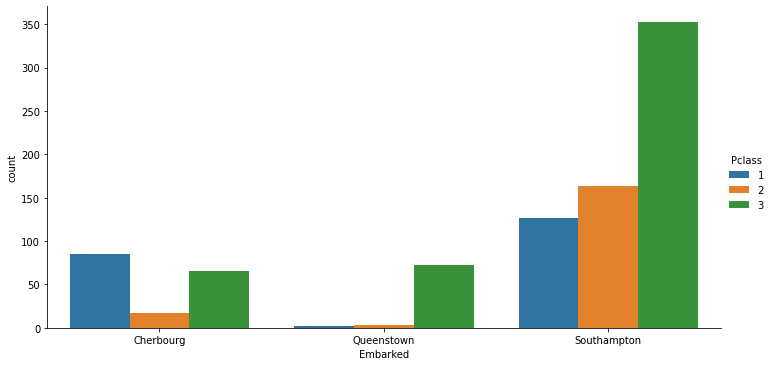

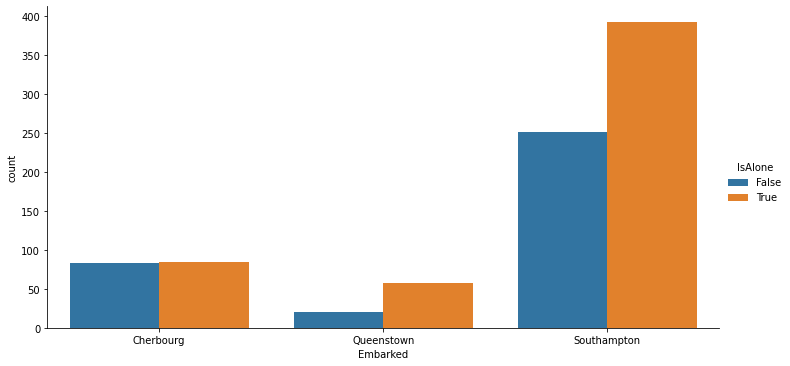

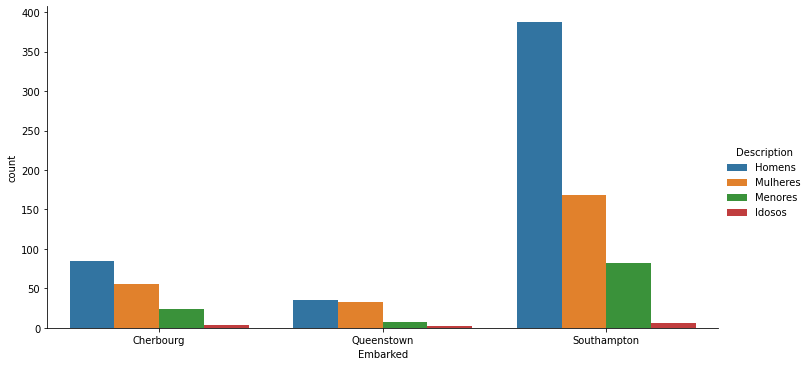

In [79]:
sns.factorplot('Embarked',data=dados, hue='Pclass', kind='count', aspect=2, order=city_map.keys()).set_xticklabels(city_map.values())

sns.factorplot('Embarked',data=dados, hue='IsAlone', kind='count', aspect=2, order=city_map.keys()).set_xticklabels(city_map.values())

sns.factorplot('Embarked',data=dados, hue='Description', kind='count', aspect=2, order=city_map.keys()).set_xticklabels(city_map.values())

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

dados[dados.IsAlone].Description.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1, title='Alone people')
ax1.axis('equal')
dados[~dados.IsAlone].Description.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax2, title='People with Family')
ax2.axis('equal')


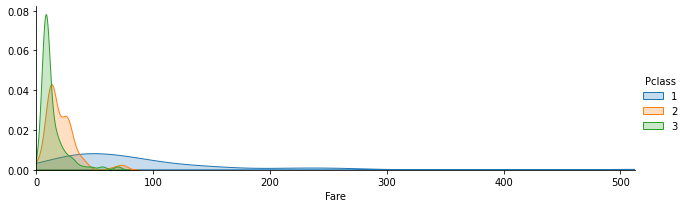

In [83]:
def plot_line_graph(x, hue):
    fig = sns.FacetGrid(dados, hue=hue, aspect=3)
    fig.map(sns.kdeplot, x, shade=True)
    fig.set(xlim=(0, dados[x].max()))
    fig.add_legend()
    return fig

plot_line_graph('Fare', 'Pclass')

In [ ]:
fig = plot_line_graph('Age', 'Sex')
fig.ax.axvline(18, color='r')
fig.ax.axvline(65, color='gray')

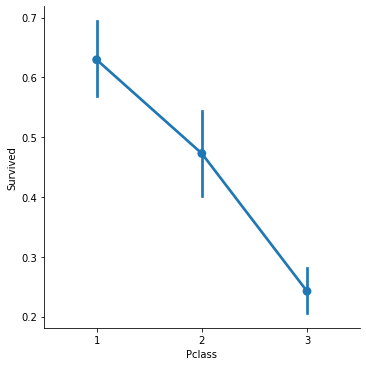

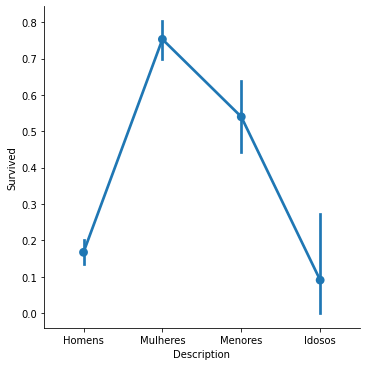

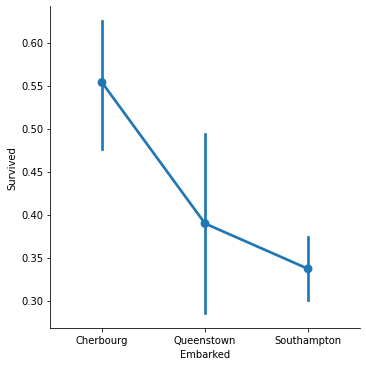

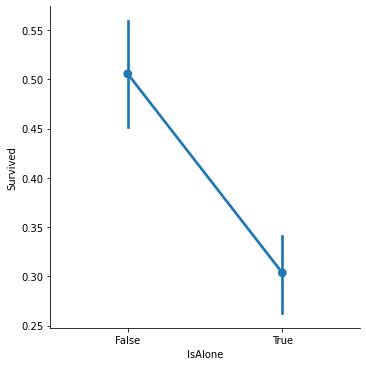

In [86]:
sns.factorplot('Pclass', 'Survived', data=dados)
sns.factorplot('Description', 'Survived', data=dados)
sns.factorplot('Embarked', 'Survived', data=dados, order=city_map.keys()).set_xticklabels(city_map.values())
sns.factorplot('IsAlone', 'Survived', data=dados)